# Setup

In [21]:
from IPython.display import display

from brightway2 import *
import bw2analyzer as bwa
import brightway2 as bw
from bw2data.parameters import *
from lci_to_bw2 import *
from bw2data.project import ProjectManager
from bw2data.parameters import (ActivityParameter, DatabaseParameter,
                                ProjectParameter, Group)

import pandas as pd
import numpy as np

import math
from decimal import *

import pathlib

import sqlite3

import os

import seaborn as sns

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
%matplotlib inline

In [22]:
# Defining the directory with datasets:
ROOT_DIR = "files"

In [23]:
# Listing the available Brightway2 projects:
bw.projects

Brightway2 projects manager with 6 objects:
	LCA_Glazing
	LCA_Glazing_0
	LCI_Vitrages
	LCOPT_Setup
	default
	test
Use `projects.report()` to get a report on all projects.

In [24]:
# Creating a new project or accessing an existing one:
bw.projects.set_current("LCI_Vitrages")

# Locating the current project:
bw.projects.dir

'C:\\Users\\souvi\\AppData\\Local\\pylca\\Brightway3\\LCI_Vitrages.2844c86551d5cf5b8502e5ae13dbf4ba'

# Import of LCA Databases

Importing databases that include LCIA methods, global life cycle inventories (Ecoinvent and Biosphere 3) and those that are specific to this study (saved as Excel files in the subfolder "files").

In [25]:
# Print the databases already available in the current project:
bw.databases

Databases dictionary with 5 object(s):
	biosphere3
	ecoinvent 3.7 cut-off
	exldb_alu
	exldb_igu
	exldb_sand

## Ecoinvent and Biosphere 3

**Importing Biosphere 3:**

Biosphere 3 is the default biosphere database with all the resource and emission flows from the ecoinvent database, version 2.

In [26]:
# Importing elementary flows, LCIA methods and some other data
bw.bw2setup()

Biosphere database already present!!! No setup is needed


**Importing Ecoinvent 3.7, cut-off system model:**

For more information about the system models in ecoinvent, and especially the cut-off one, read [this](https://ecoinvent.org/the-ecoinvent-database/system-models/).

In [27]:
# Importing the ecoinvent 3.7 cut-off database, saved locally:
ei37cutdir = (r"C:\Users\souvi\Documents\These\80_Calculations\_Ecoinvent_Dataset\ecoinvent 3.7_cutoff_ecoSpold02\datasets")

if 'ecoinvent 3.7 cut-off' in databases:
    print("Database has already been imported!")
else:
    ei37cut = bw.SingleOutputEcospold2Importer(
        ei37cutdir, 'ecoinvent 3.7 cut-off')
    ei37cut.apply_strategies()
    ei37cut.statistics()
    ei37cut.write_database()

Database has already been imported!


## Excel Datasets

Import of the life cycle inventory specific to this case study and saved in the Excel files.

**Importing the Excel dataset relating to aluminium, regionalised (Western Europe) for the case study:**

In [28]:
imp = bw.ExcelImporter(os.path.join(ROOT_DIR, "lci_alu.xlsx"))
imp.apply_strategies()
imp.match_database(fields=('name', 'unit', 'location'))
imp.match_database("ecoinvent 3.7 cut-off",
                   fields=('name', 'unit', 'location', 'input'))
imp.statistics()

# Checking whether the import went as expected.
# Creating an Excel sheet with process data:
imp.write_excel()

# Writing the data to a database to save it:
imp.write_database()

Extracted 2 worksheets in 0.02 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 0.25 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


2 datasets
12 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\souvi\AppData\Local\pylca\Brightway3\LCI_Vitrages.2844c86551d5cf5b8502e5ae13dbf4ba\output\db-matching-exldb_alu.xlsx


0% [##] 100% | ETA: 00:00:01
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 04/20/2023 10:59:32
  Finished: 04/20/2023 10:59:32
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 21.53
Created database: exldb_alu


**Importing the Excel dataset relating to silica sand production, regionalised for the case study:**

In [29]:
imp = bw.ExcelImporter(os.path.join(ROOT_DIR, "lci_silica_sand.xlsx"))
imp.apply_strategies()
imp.match_database(fields=('name', 'unit', 'location'))
imp.match_database("ecoinvent 3.7 cut-off",
                   fields=('name', 'unit', 'location', 'input'))
imp.statistics()
imp.write_excel()
imp.write_database()

Extracted 2 worksheets in 0.03 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 0.23 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


2 datasets
29 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\souvi\AppData\Local\pylca\Brightway3\LCI_Vitrages.2844c86551d5cf5b8502e5ae13dbf4ba\output\db-matching-exldb_sand.xlsx


0% [##] 100% | ETA: 00:00:01
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 04/20/2023 10:59:34
  Finished: 04/20/2023 10:59:34
  Total time elapsed: 00:00:00
  CPU %: 0.00
  Memory %: 21.53
Created database: exldb_sand


**Importing the Excel dataset relating to the insulating glass units:**

In [30]:
imp = bw.ExcelImporter(os.path.join(ROOT_DIR, "lci_vitrages.xlsx"))
imp.apply_strategies()
imp.match_database(fields=('name', 'unit', 'location'))
imp.match_database("ecoinvent 3.7 cut-off",
                   fields=('name', 'unit', 'location'))
imp.match_database("exldb_alu",
                   fields=('name', 'unit', 'location', 'input'))
imp.match_database("exldb_sand",
                   fields=('name', 'unit', 'location', 'input'))
imp.statistics()
imp.write_excel()

# Adding the project-level parameters:
imp.write_project_parameters()

# Writing the data to a database to save it:
imp.write_database()

Extracted 44 worksheets in 0.30 seconds
Applying strategy: csv_restore_tuples
Applying strategy: csv_restore_booleans
Applying strategy: csv_numerize
Applying strategy: csv_drop_unknown
Applying strategy: csv_add_missing_exchanges_section
Applying strategy: normalize_units
Applying strategy: normalize_biosphere_categories
Applying strategy: normalize_biosphere_names
Applying strategy: strip_biosphere_exc_locations
Applying strategy: set_code_by_activity_hash
Applying strategy: link_iterable_by_fields
Applying strategy: assign_only_product_as_production
Applying strategy: link_technosphere_by_activity_hash
Applying strategy: drop_falsey_uncertainty_fields_but_keep_zeros
Applying strategy: convert_uncertainty_types_to_integers
Applying strategy: convert_activity_parameters_to_list
Applied 16 strategies in 0.25 seconds
Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields


Writing activities to SQLite3 database:


Applying strategy: link_iterable_by_fields
Applying strategy: link_iterable_by_fields
44 datasets
379 exchanges
0 unlinked exchanges
  
Wrote matching file to:
C:\Users\souvi\AppData\Local\pylca\Brightway3\LCI_Vitrages.2844c86551d5cf5b8502e5ae13dbf4ba\output\db-matching-exldb_igu.xlsx


0% [##############################] 100% | ETA: 00:00:00
Total time elapsed: 00:00:00


Title: Writing activities to SQLite3 database:
  Started: 04/20/2023 10:59:38
  Finished: 04/20/2023 10:59:38
  Total time elapsed: 00:00:00
  CPU %: 86.00
  Memory %: 21.53
Created database: exldb_igu


**Checking if the imports went well:**

List databases:

In [31]:
bw.databases

Databases dictionary with 5 object(s):
	biosphere3
	ecoinvent 3.7 cut-off
	exldb_alu
	exldb_igu
	exldb_sand

## Navigating through the Databases

Assigning a variable to each database to ease their use:

In [32]:
eib3db = bw.Database('biosphere3')

eicutdb = bw.Database('ecoinvent 3.7 cut-off')

exldb_alu = bw.Database('exldb_alu')
exldb_igu = bw.Database('exldb_igu')

Searching for a specific activity:

# Defining the Parameters

## Overview

Checking the total number of parameters:

In [33]:
len(parameters)

8

Listing the parameters:

In [34]:
if len(ProjectParameter.select()) != 0:
    print("\033[1m", "Project parameters:", "\033[0m")
    for p in ProjectParameter.select():
        print(p.name, ":", p.amount)

print("------")
print("\033[1m", "Database parameters:", "\033[0m")
for p in DatabaseParameter.select():
    print(p.database, " > ", p.name, ":", round(p.amount, 2))

 Project parameters: 
param_g_density : 2.5
param_t_lsg : 8.0
param_t_tsg : 8.0
param_n_pvb : 2.0
param_d1 : 125.0
param_t_g_ext : 4.0
param_t_g_mid_tg : 3.0
param_t_g_uncoated_int : 4.0
------
 Database parameters: 


## Activating the Parameters

This step consists in asking Brightway2 to activate the exchanges and their formulas, when the latter rely on parameters:

In [35]:
# Including formula-defined exchanges of activities to a new group,
# for igu production:
for act in exldb_igu:
    parameters.add_exchanges_to_group("igu_param_group", act)

And finally, the exchanges are recalculated on the basis of the "activated" formula:

In [36]:
ActivityParameter.recalculate_exchanges("igu_param_group")

**If needed, delete the parameters:**

# LCIA Methods

This section defines the LCIA methods. They are all based on ILCD 2.0 2018 midpoint, a version by Ecoinvent of the Environmental Footprint (EF) midpoint method. Three groups are created according to the number of impact indicators included: only global warming potential, nine, or sixteen. 

For further information regarding the EF midpoint method: Fazio et al., 2018. ‘Supporting Information to the Characterisation Factors of Recommended EF Life Cycle Impact Assessment Methods: New Methods and Differences with ILCD.’ Luxembourg: The European Commission and the Joint Research Centre. http://publications.europa.eu/publication/manifestation_identifier/PUB_KJNA28888ENN.

Creating list of methods:

In [37]:
method_ilcd_gwp = (
    'ILCD 2.0 2018 midpoint', 'climate change', 'climate change total')

In [38]:
ls_method_small = [
    ('ILCD 2.0 2018 midpoint', 'climate change', 'climate change total'),
    ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater ecotoxicity'),
    ('ILCD 2.0 2018 midpoint', 'ecosystem quality',
     'freshwater and terrestrial acidification'),
    ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater eutrophication'),
    ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'terrestrial eutrophication'),
    ('ILCD 2.0 2018 midpoint', 'human health', 'ozone layer depletion'),
    ('ILCD 2.0 2018 midpoint', 'human health', 'photochemical ozone creation'),
    ('ILCD 2.0 2018 midpoint', 'resources', 'fossils'),
    ('ILCD 2.0 2018 midpoint', 'resources', 'land use')
]

In [39]:
ls_method_full = [
    ('ILCD 2.0 2018 midpoint', 'climate change', 'climate change total'),
    ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater ecotoxicity'),
    ('ILCD 2.0 2018 midpoint', 'ecosystem quality',
     'freshwater and terrestrial acidification'),
    ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'freshwater eutrophication'),
    ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'marine eutrophication'),
    ('ILCD 2.0 2018 midpoint', 'ecosystem quality', 'terrestrial eutrophication'),
    ('ILCD 2.0 2018 midpoint', 'human health', 'non-carcinogenic effects'),
    ('ILCD 2.0 2018 midpoint', 'human health', 'carcinogenic effects'),
    ('ILCD 2.0 2018 midpoint', 'human health', 'ionising radiation'),
    ('ILCD 2.0 2018 midpoint', 'human health', 'ozone layer depletion'),
    ('ILCD 2.0 2018 midpoint', 'human health', 'photochemical ozone creation'),
    ('ILCD 2.0 2018 midpoint', 'human health', 'respiratory effects, inorganics'),
    ('ILCD 2.0 2018 midpoint', 'resources', 'minerals and metals'),
    ('ILCD 2.0 2018 midpoint', 'resources', 'dissipated water'),
    ('ILCD 2.0 2018 midpoint', 'resources', 'fossils'),
    ('ILCD 2.0 2018 midpoint', 'resources', 'land use')
]

# Weighting

The weighting step follows the European Environmental Footprint Methodology, which define weighting factors for each of the mid-point impact categories. See the following report:

Sala, Serenella, Alessandro Kim Cerutti, and Rana Pant. ‘Development of a Weighting Approach for the Environmental Footprint’. Luxembourg: Publications Office of the European Union, 2018. https://ec.europa.eu/environment/eussd/smgp/documents/2018_JRC_Weighting_EF.pdf.

In [40]:
# Matching impact labels between the Ecovinvent ILCD 2018 method
# and the report by Sala et al.:
dict_ilcd_to_weight = {
    ('climate change', 'climate change total'): (
        "Climate change"),
    ('human health', 'ozone layer depletion'): (
        "Ozone depletion"),
    ('human health', 'carcinogenic effects'): (
        "Human toxicity, cancer effects"),
    ('human health', 'non-carcinogenic effects'): (
        "Human toxicity, non-cancer effects"),
    ('human health', 'respiratory effects, inorganics'): (
        "Particulate matter"),
    ('human health', 'ionising radiation'): (
        "Ionizing radiation, human health"),
    ('human health', 'photochemical ozone creation'): (
        "Photochemical ozone formation, human health"),
    ('ecosystem quality', 'freshwater and terrestrial acidification'): (
        "Acidification"),
    ('ecosystem quality', 'terrestrial eutrophication'): (
        "Eutrophication, terrestrial"),
    ('ecosystem quality', 'freshwater eutrophication'): (
        "Eutrophication, freshwater"),
    ('ecosystem quality', 'marine eutrophication'): (
        "Eutrophication, marine"),
    ('ecosystem quality', 'freshwater ecotoxicity'): (
        "Ecotoxicity freshwater"),
    ('resources', 'land use'): (
        "Land use"),
    ('resources', 'dissipated water'): (
        "Water use"),
    ('resources', 'minerals and metals'): (
        "Resource use, minerals and metals"),
    ('resources', 'fossils'): (
        "Resource use, fossils")
}

In [41]:
# List of weighting factors by impact category:
dict_weighting = {"Climate change": 21.06,
                  "Ozone depletion": 6.31,
                  "Human toxicity, cancer effects": 2.13,
                  "Human toxicity, non-cancer effects": 1.84,
                  "Particulate matter": 8.96,
                  "Ionizing radiation, human health": 5.01,
                  "Photochemical ozone formation, human health": 4.78,
                  "Acidification": 6.20,
                  "Eutrophication, terrestrial": 3.71,
                  "Eutrophication, freshwater": 2.80,
                  "Eutrophication, marine": 2.96,
                  "Ecotoxicity freshwater": 1.92,
                  "Land use": 7.94,
                  "Water use": 8.51,
                  "Resource use, minerals and metals": 7.55,
                  "Resource use, fossils": 8.32
                  }

In [42]:
# Creating a DataFrame with the weighting factors:
df_weighting = pd.DataFrame.from_dict(dict_ilcd_to_weight, orient='index',
                                      columns=['Weighting factor'])

for key, value in dict_weighting.items():
    df_weighting.loc[df_weighting['Weighting factor'] == key,
                     'Weighting factor'] = value

    df_weighting.index = pd.MultiIndex.from_tuples(
        df_weighting.index, names=['Category', 'Subcategory']
    )

In [43]:
df_weighting

Weighting factor
Category          Subcategory                                              
climate change    climate change total                                21.06
human health      ozone layer depletion                                6.31
                  carcinogenic effects                                 2.13
                  non-carcinogenic effects                             1.84
                  respiratory effects, inorganics                      8.96
                  ionising radiation                                   5.01
                  photochemical ozone creation                         4.78
ecosystem quality freshwater and terrestrial acidification              6.2
                  terrestrial eutrophication                           3.71
                  freshwater eutrophication                             2.8
                  marine eutrophication                                2.96
                  freshwater ecotoxicity                               1.92
resources         land use                                             7.94
                  dissipated water                                     8.51
                  minerals and metals                                  7.55
                  fossils                                              8.32

# A Comparative LCA of Flat Glass Panes and IGUs, Cradle-to-Gate

This section studies different types of flat glass and insulating glass units, comparing the main components and different designs to understand their contribution to environmental impact.

## Flat Glass Production

A first LCA study focusing on the production of flat glass and its processing (laminated, toughened, coated...).

Listing the activities studied in this LCA:

In [44]:
# Unprocessed flat glass:
inv_fg = [act for act in exldb_igu
          if 'market for flat glass' in act['name']
          ]

inv_fg = sorted(inv_fg,
                key=lambda k: k['name']
                )

In [45]:
# Processed flat glass:
ls_fg_processed = ['market for laminated safety glass',
                   'market for tempered safety glass',
                   'market for smart glass'
                   ]

inv_fg_processed = [act for act in exldb_igu
                    for n in ls_fg_processed
                    if n in act['name']
                    and "glazing" not in act['name']
                    ]

inv_fg_processed = sorted(inv_fg_processed,
                          key=lambda k: k['name']
                          )

In [46]:
print("\033[1m",
      "List of activities related to flat glass production:", "\033[0m"
      )

for fg in (inv_fg and inv_fg_processed):
    print(fg['name'])

 List of activities related to flat glass production: 
market for laminated safety glass
market for laminated safety glass, coated
market for smart glass
market for tempered safety glass
market for tempered safety glass, coated


Defining the functional unit per glass type:

In [47]:
# Defining the functional unit for unprocessed flat glass,
# i.e., 25kg of glass to obtain a thickness of 10mm for 1m²:
fu_fg = 25

# Defining the functional unit for processed flat glass,
# i.e., 1m² with a thickness already defined as 10mm:
fu_fg_processed = 1

Conducting the LCIA:

In [48]:
# Creating a list where results will be saved:
impact_fg = []

# Calculating:
for act in inv_fg:
    lca = bw.LCA({act: fu_fg})
    lca.lci()
    for method in ls_method_small:
        lca.switch_method(method)
        lca.lcia()
        impact_fg.append((act["name"], act["location"],
                          method[1], lca.score,
                          bw.methods.get(method).get('unit')))

for act in inv_fg_processed:
    lca = bw.LCA({act: fu_fg_processed})
    lca.lci()
    for method in ls_method_small:
        lca.switch_method(method)
        lca.lcia()
        impact_fg.append((act["name"], act["location"],
                          method[1], lca.score,
                          bw.methods.get(method).get('unit')))

Creating a DataFrame with the LCIA results:

In [49]:
df_impact_fg = pd.DataFrame(impact_fg, columns=["Name",
                                                "Location",
                                                "Method",
                                                "Score",
                                                "Unit"]
                            )

df_impact_fg = (pd.pivot_table(df_impact_fg, index=["Name"],
                               columns=["Method", "Unit"],
                               values="Score"
                               )
                ).sort_values(("climate change", "kg CO2-Eq"), ascending=True)

df_impact_fg.index = df_impact_fg.index.str.replace('market for ', '')

df_impact_fg.round(2)

Method                         climate change ecosystem quality          \
Unit                                kg CO2-Eq               CTU kg P-Eq   
Name                                                                      
tempered safety glass                   23.38              5.85    0.00   
tempered safety glass, coated           24.69              7.53    0.00   
flat glass, uncoated                    27.11              7.08    0.00   
flat glass, coated                      28.71              9.15    0.00   
laminated safety glass                  31.40             10.90    0.00   
laminated safety glass, coated          32.05             11.75    0.00   
smart glass                             37.49             15.26    0.01   

Method                                            human health             \
Unit                           mol H+-Eq mol N-Eq   kg CFC-11. kg NMVOC-.   
Name                                                                        
tempered safety glass               0.18     0.50          0.0       0.12   
tempered safety glass, coated       0.19     0.52          0.0       0.12   
flat glass, uncoated                0.22     0.60          0.0       0.14   
flat glass, coated                  0.24     0.63          0.0       0.15   
laminated safety glass              0.21     0.56          0.0       0.14   
laminated safety glass, coated      0.22     0.58          0.0       0.14   
smart glass                         0.23     0.60          0.0       0.15   

Method                         resources          
Unit                           megajoule  points  
Name                                              
tempered safety glass             301.77   85.26  
tempered safety glass, coated     328.83  119.40  
flat glass, uncoated              344.41  104.18  
flat glass, coated                377.57  146.02  
laminated safety glass            553.67  175.57  
laminated safety glass, coated    567.20  192.64  
smart glass                       768.65  252.96

Displaying a bar chart showing the climate change potential of the different flat glass products:

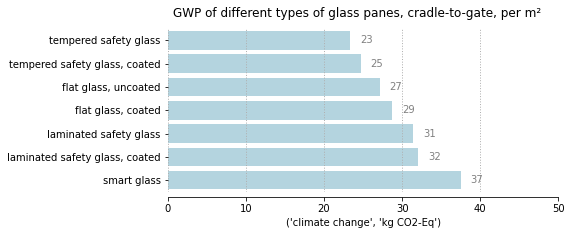

In [50]:
fig, ax = plt.subplots(figsize=(7, 3))

g = sns.barplot(data=df_impact_fg,
                x=("climate change", "kg CO2-Eq"),
                y=df_impact_fg.index,
                color="lightblue", linewidth=1.5)

g.bar_label(g.containers[0], fmt="%.0f", padding=10, c='grey')

ax.yaxis.label.set_visible(False)
ax.grid(which='major', axis='x', linestyle=':', linewidth=1)

ax.set_xlim(0, 50)
plt.xticks(np.arange(0, 51, 10))

fig.suptitle(
    'GWP of different types of glass panes, cradle-to-gate, per m²')
sns.despine(left=True, offset=5)

plt.show()

Creating a DataFrame where the LCIA results are normalised to the highest value per impact category (i.e., $I_{max}= 1$):

In [51]:
df_norm_impact_fg = df_impact_fg / df_impact_fg.max()
df_norm_impact_fg.round(2)

Method                         climate change ecosystem quality          \
Unit                                kg CO2-Eq               CTU kg P-Eq   
Name                                                                      
tempered safety glass                    0.62              0.38    0.26   
tempered safety glass, coated            0.66              0.49    0.32   
flat glass, uncoated                     0.72              0.46    0.31   
flat glass, coated                       0.77              0.60    0.40   
laminated safety glass                   0.84              0.71    0.57   
laminated safety glass, coated           0.85              0.77    0.60   
smart glass                              1.00              1.00    1.00   

Method                                            human health             \
Unit                           mol H+-Eq mol N-Eq   kg CFC-11. kg NMVOC-.   
Name                                                                        
tempered safety glass               0.77     0.78         0.20       0.78   
tempered safety glass, coated       0.82     0.82         0.21       0.82   
flat glass, uncoated                0.94     0.95         0.23       0.95   
flat glass, coated                  1.00     1.00         0.24       1.00   
laminated safety glass              0.90     0.89         0.42       0.92   
laminated safety glass, coated      0.93     0.91         0.42       0.94   
smart glass                         0.98     0.95         1.00       0.99   

Method                         resources         
Unit                           megajoule points  
Name                                             
tempered safety glass               0.39   0.34  
tempered safety glass, coated       0.43   0.47  
flat glass, uncoated                0.45   0.41  
flat glass, coated                  0.49   0.58  
laminated safety glass              0.72   0.69  
laminated safety glass, coated      0.74   0.76  
smart glass                         1.00   1.00

In [52]:
# Normalised results, but without smart glass:
df_norm_impact_wo_smartg = (
    df_impact_fg.drop("smart glass", axis=0) /
    df_impact_fg.drop("smart glass", axis=0).max()
)
df_norm_impact_wo_smartg.round(2)

Method                         climate change ecosystem quality          \
Unit                                kg CO2-Eq               CTU kg P-Eq   
Name                                                                      
tempered safety glass                    0.73              0.50    0.43   
tempered safety glass, coated            0.77              0.64    0.54   
flat glass, uncoated                     0.85              0.60    0.53   
flat glass, coated                       0.90              0.78    0.66   
laminated safety glass                   0.98              0.93    0.94   
laminated safety glass, coated           1.00              1.00    1.00   

Method                                            human health             \
Unit                           mol H+-Eq mol N-Eq   kg CFC-11. kg NMVOC-.   
Name                                                                        
tempered safety glass               0.77     0.78         0.48       0.78   
tempered safety glass, coated       0.82     0.82         0.50       0.82   
flat glass, uncoated                0.94     0.95         0.54       0.95   
flat glass, coated                  1.00     1.00         0.57       1.00   
laminated safety glass              0.90     0.89         0.99       0.92   
laminated safety glass, coated      0.93     0.91         1.00       0.94   

Method                         resources         
Unit                           megajoule points  
Name                                             
tempered safety glass               0.53   0.44  
tempered safety glass, coated       0.58   0.62  
flat glass, uncoated                0.61   0.54  
flat glass, coated                  0.67   0.76  
laminated safety glass              0.98   0.91  
laminated safety glass, coated      1.00   1.00

**Now, same calculation, but using the MultiLCA class with the full list of impact categories, i.e., the 16 indicators from the ILCD midpoint method:**

In [53]:
# Defining the system with the same activities and functional units as above:
mlca_syst_fg = []

for act in inv_fg:
    mlca_syst_fg.append({act.key: fu_fg})

for act in inv_fg_processed:
    mlca_syst_fg.append({act.key: fu_fg_processed})

Conducting the LCIA:

In [54]:
bw.calculation_setups['calculation_setup'] = {'inv': mlca_syst_fg,
                                              'ia': ls_method_full}

mlca = bw.MultiLCA('calculation_setup')

# Saving the results in a DataFrame:
df_impact_mlca_fg = pd.DataFrame(data=mlca.results, columns=mlca.methods)

Reorganisating a bit the DataFrame:

In [55]:
# Listing the activities concerned:
activities = [(get_activity(key), amount)
              for dct in mlca.func_units
              for key, amount in dct.items()
              ]

# Creating a DataFrame with activities info:
df_fu = pd.DataFrame([(x['name'], x['database'], x['code'],
                       x['location'], x['unit'], y)
                      for x, y in activities],
                     columns=('Database', 'Code', 'Name',
                              'Location', 'Unit', 'Amount')
                     )

# Merging activities info and LCIA results:
df_impact_mlca_fg = pd.concat([df_fu, df_impact_mlca_fg], axis=1
                              ).set_index("Name").drop(
    ["Database", "Code", "Location", "Unit", "Amount"], axis=1
)

# Renaming the columns with multi-index, according to LCIA method:
df_impact_mlca_fg.columns = pd.MultiIndex.from_tuples(
    df_impact_mlca_fg.columns, names=(
        'Method', 'Category', 'Subcategory')
)

# Sorting results:
df_impact_mlca_fg = df_impact_mlca_fg.sort_values(
    ('ILCD 2.0 2018 midpoint', 'climate change', 'climate change total'),
    ascending=True)

In [56]:
with pd.option_context("display.max_rows", None,
                       "display.max_columns", None,
                       "display.float_format", '{:12.1e}'.format):
    display(df_impact_mlca_fg["ILCD 2.0 2018 midpoint"])

Category                    climate change      ecosystem quality  \
Subcategory           climate change total freshwater ecotoxicity   
Name                                                                
market_tsg                         2.3e+01                5.8e+00   
market_tsg_coated                  2.5e+01                7.5e+00   
market_glass_uncoated              2.7e+01                7.1e+00   
market_glass_coated                2.9e+01                9.1e+00   
market_lsg                         3.1e+01                1.1e+01   
market_lsg_coated                  3.2e+01                1.2e+01   
market_smartglass                  3.7e+01                1.5e+01   

Category                                                        \
Subcategory           freshwater and terrestrial acidification   
Name                                                             
market_tsg                                             1.8e-01   
market_tsg_coated                                      1.9e-01   
market_glass_uncoated                                  2.2e-01   
market_glass_coated                                    2.4e-01   
market_lsg                                             2.1e-01   
market_lsg_coated                                      2.2e-01   
market_smartglass                                      2.3e-01   

Category                                                               \
Subcategory           freshwater eutrophication marine eutrophication   
Name                                                                    
market_tsg                              2.1e-03               4.3e-02   
market_tsg_coated                       2.6e-03               4.5e-02   
market_glass_uncoated                   2.5e-03               5.2e-02   
market_glass_coated                     3.2e-03               5.4e-02   
market_lsg                              4.5e-03               5.0e-02   
market_lsg_coated                       4.8e-03               5.1e-02   
market_smartglass                       8.0e-03               5.4e-02   

Category                                                     human health  \
Subcategory           terrestrial eutrophication non-carcinogenic effects   
Name                                                                        
market_tsg                               5.0e-01                  8.4e-07   
market_tsg_coated                        5.2e-01                  1.2e-06   
market_glass_uncoated                    6.0e-01                  1.0e-06   
market_glass_coated                      6.3e-01                  1.4e-06   
market_lsg                               5.6e-01                  1.7e-06   
market_lsg_coated                        5.8e-01                  1.9e-06   
market_smartglass                        6.0e-01                  2.8e-06   

Category                                                       \
Subcategory           carcinogenic effects ionising radiation   
Name                                                            
market_tsg                         2.0e-07            2.5e+00   
market_tsg_coated                  2.8e-07            3.2e+00   
market_glass_uncoated              2.4e-07            3.1e+00   
market_glass_coated                3.4e-07            3.9e+00   
market_lsg                         3.9e-07            8.6e+00   
market_lsg_coated                  4.3e-07            8.9e+00   
market_smartglass                  5.4e-07            1.6e+01   

Category                                                                  \
Subcategory           ozone layer depletion photochemical ozone creation   
Name                                                                       
market_tsg                          2.4e-06                      1.2e-01   
market_tsg_coated                   2.5e-06                      1.2e-01   
market_glass_uncoated               2.7e-06                      1.4e-01   
market_glass_coated                 2.9

In [57]:
df_impact_mlca_fg.to_csv('outputs\lca_table\df_impact_mlca_fg.csv')

Creating a DataFrame where the LCIA results are normalised to the highest value per impact category (i.e., $I_{max}= 1$):

In [58]:
df_norm_impact_mlca_fg = df_impact_mlca_fg / df_impact_mlca_fg.max()

# Reorganising the DataFrame columns:
df_norm_impact_mlca_fg.columns = (
    df_norm_impact_mlca_fg.columns.droplevel([0, 1])
)

Displaying a heatmap with the normalised results (1 = maximum impact):

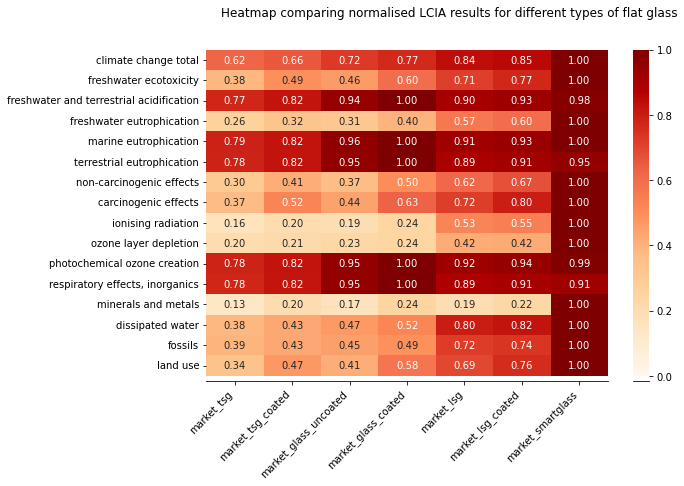

In [59]:
fig, ax = plt.subplots(figsize=(9, 6))

df_plot = df_norm_impact_mlca_fg.T

ax = sns.heatmap(df_plot, cmap="OrRd", vmin=0, vmax=1, annot=True, fmt='.2f')

ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)

fig.suptitle(
    'Heatmap comparing normalised LCIA results'
    ' for different types of flat glass')

sns.despine(left=True, offset=5)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')

plt.show()

Displaying a chart giving an overview of the environmental impact of each flat glass product according to each of the 16 indicators:

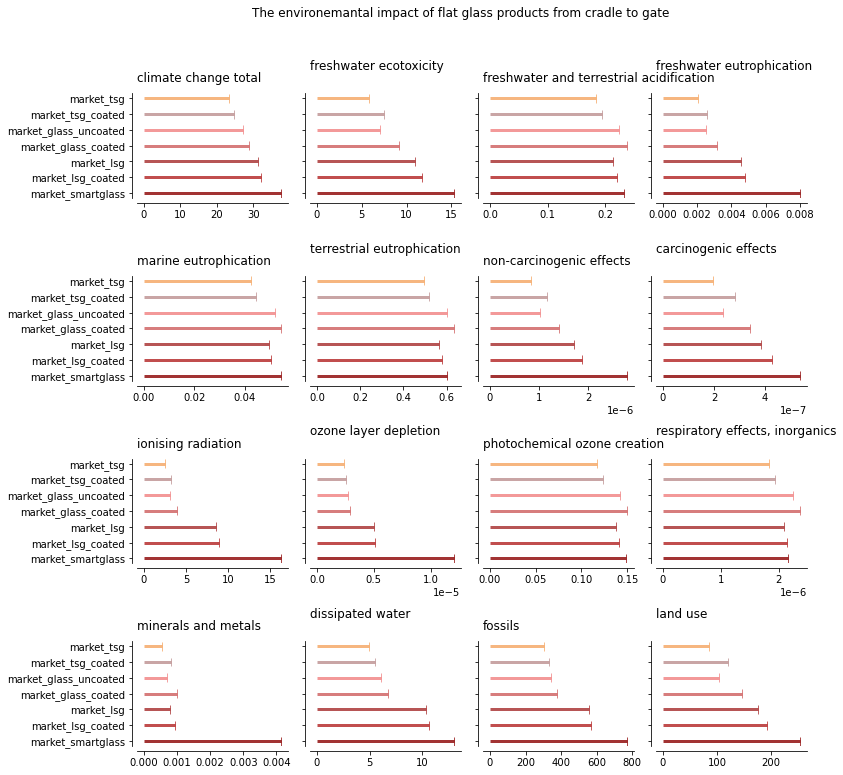

In [62]:
fig, axes = plt.subplots(nrows=4, ncols=4,
                         sharex=False, sharey=True,
                         figsize=(12, 12))

df_plot = df_impact_mlca_fg.copy()
df_plot.columns = (df_impact_mlca_fg.columns.droplevel([0, 1]))

c = ["sandybrown", "rosybrown", "lightcoral", "indianred",
     "brown", "firebrick", "darkred"]

n = 0

for row in range(4):
    for col in range(4):
        col_name = df_plot.columns[n]
        ax = axes[row][col]

        ax.hlines(y=df_plot.index, xmin=0, xmax=df_plot[col_name],
                  linewidth=3, colors=c, alpha=0.8)

        sns.scatterplot(y=df_plot.index, x=df_plot[col_name],
                        hue=df_plot.index, s=80, marker="|",
                        palette=c, ax=ax)

        if (n % 2) == 0:
            ax.set_title(col_name, y=1.05, x=0,
                         ha='left', multialignment='left')
        else:
            ax.set_title(col_name, y=1.17, x=0,
                         ha='left', multialignment='left')

        ax.xaxis.label.set_visible(False)
        ax.yaxis.label.set_visible(False)

        ax.get_legend().remove()

        n += 1

fig.subplots_adjust(wspace=0.15, hspace=0.75)

fig.suptitle(
    'The environemantal impact of flat glass products from cradle to gate'
)
sns.despine(offset=5)

**Weighted environmental impact:**

Comparing the different types of glass pane according to a single indicator calculated using the PEF weighting factors:

In [63]:
# Defining a new DataFrame with the weighted values,
# i.e., multiplication of the impacts by df_weighting:
df_weighted_fg = pd.DataFrame(
    (df_impact_mlca_fg["ILCD 2.0 2018 midpoint"]
     .multiply(df_weighting["Weighting factor"].T, axis=1) / 100
     ).sum(axis=1), columns=['Weighted impact']
)

df_weighted_fg = df_weighted_fg.sort_values("Weighted impact",
                                            ascending=True
                                            )

df_weighted_fg

,Weighted impact
Name,
market_tsg,37.499843
market_tsg_coated,42.852941
market_glass_uncoated,43.487143
market_glass_coated,50.047313
market_lsg,68.180507
market_lsg_coated,70.857056
market_smartglass,94.189835


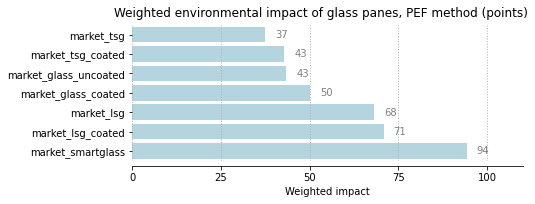

In [65]:
# Displaying a barplot figure with the weighted results:
fig, ax = plt.subplots(figsize=(7, 2.5))

g = sns.barplot(data=df_weighted_fg,
                x="Weighted impact",
                y=df_weighted_fg.index,
                color="lightblue", linewidth=1.5)

g.bar_label(g.containers[0], fmt="%.0f", padding=10, c='grey')

ax.yaxis.label.set_visible(False)
ax.grid(which='major', axis='x', linestyle=':', linewidth=1)

ax.set_xlim(0, 110)
plt.xticks(np.arange(0, 101, 25))

fig.suptitle('Weighted environmental impact of glass panes,'
             ' PEF method (points)')
sns.despine(left=True, offset=5)

## From Single to Triple Glazing: A Comparative LCA of IGUs, Cradle-to-Gate

Listing the IGUs (market activities) and the functional units:

In [66]:
# List of the market actitivities relating to the glazing products studied:
inv_igus = [act for act in bw.Database("exldb_igu")
            if 'market' in act['name']
            and ('glazing' in act['name']
            or 'vacuum' in act['name'])
            ]

# 1 m² of IGU:
fu_igus = [{igu: 1} for igu in inv_igus]

In [67]:
print("\033[1m", "List of the activities assessed:", "\033[0m")

for fu in fu_igus:
    for key, value in fu.items():
        print(key["name"])

 List of the activities assessed: 
market for single glazing, lsg, coated
market for double glazing, lsg, coated, krypton
market for double glazing, lsg, two coatings, xenon
market for single glazing, lsg
market for smart glass, double glazing
market for double glazing, lsg
market for triple glazing, coated
market for double glazing, lsg, coated
market for triple glazing, lsg, two coatings
market for triple glazing, lsg, two coatings, xenon
market for double glazing, lsg, vacuum
market for triple glazing, lsg, coated
market for double glazing, coated
market for double glazing, lsg, two coatings
market for triple glazing, lsg, two coatings, krypton


Conducting the LCIA:

In [68]:
impact_igus = []

for igu in inv_igus:
    lca = bw.LCA({igu: 1})
    lca.lci()
    for method in ls_method_full:
        lca.switch_method(method)
        lca.lcia()
        impact_igus.append((igu["name"], igu["location"],
                            method[1], method[2], lca.score,
                            bw.methods.get(method).get('unit')))

Creating a DataFrame with the LCIA results:

In [69]:
# Creating a new DataFrame from the impact list:
df_impact_igus = pd.DataFrame(
    impact_igus,
    columns=["Name", "Location", "Category", "Subcategory", "Score", "Unit"]
)

# Reorganising it:
df_impact_igus = pd.pivot_table(
    df_impact_igus, index=["Name"],
    columns=["Category", "Subcategory", "Unit"], values="Score"
)

# Sorting the values:
df_impact_igus = df_impact_igus.sort_values(
    ("climate change", "climate change total", "kg CO2-Eq"), ascending=True
)

# Simplifying the index:
df_impact_igus.index = df_impact_igus.index.str.replace('market for ', '')

Normalising the results according to the highest value:

In [71]:
# With all the IGUs:
df_norm_impact_igus = df_impact_igus / df_impact_igus.max()

In [72]:
# ... and without the smart double glazing:
df_norm_impact_igus_wo_smartg = (
    df_impact_igus.drop("smart glass, double glazing", axis=0) /
    df_impact_igus.drop("smart glass, double glazing", axis=0).max()
)

Displaying a heatmap with the normalised results (1 = maximum impact):

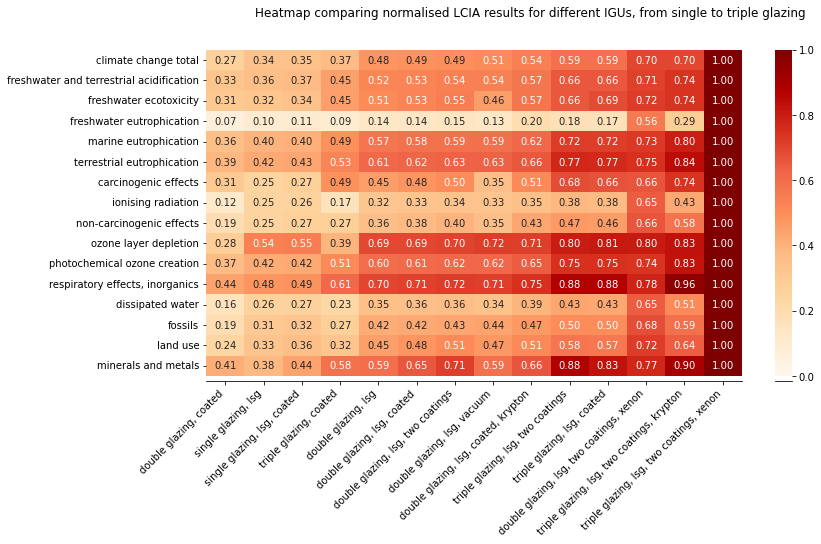

In [73]:
fig, ax = plt.subplots(figsize=(12, 6))

y_axis_labels = []
for label in df_norm_impact_igus_wo_smartg.columns:
    y_axis_labels.append(label[1])

df_plot = df_norm_impact_igus_wo_smartg.T

ax = sns.heatmap(df_plot, cmap="OrRd", vmin=0, vmax=1, annot=True, fmt='.2f',
                 yticklabels=y_axis_labels)

ax.yaxis.label.set_visible(False)
ax.xaxis.label.set_visible(False)

fig.suptitle(
    'Heatmap comparing normalised LCIA results'
    ' for different IGUs, from single to triple glazing')
sns.despine(left=True, offset=5)

for tick in ax.get_xticklabels():
    tick.set_rotation(45)
    tick.set_ha('right')

plt.show()

Displaying the full LCIA results:

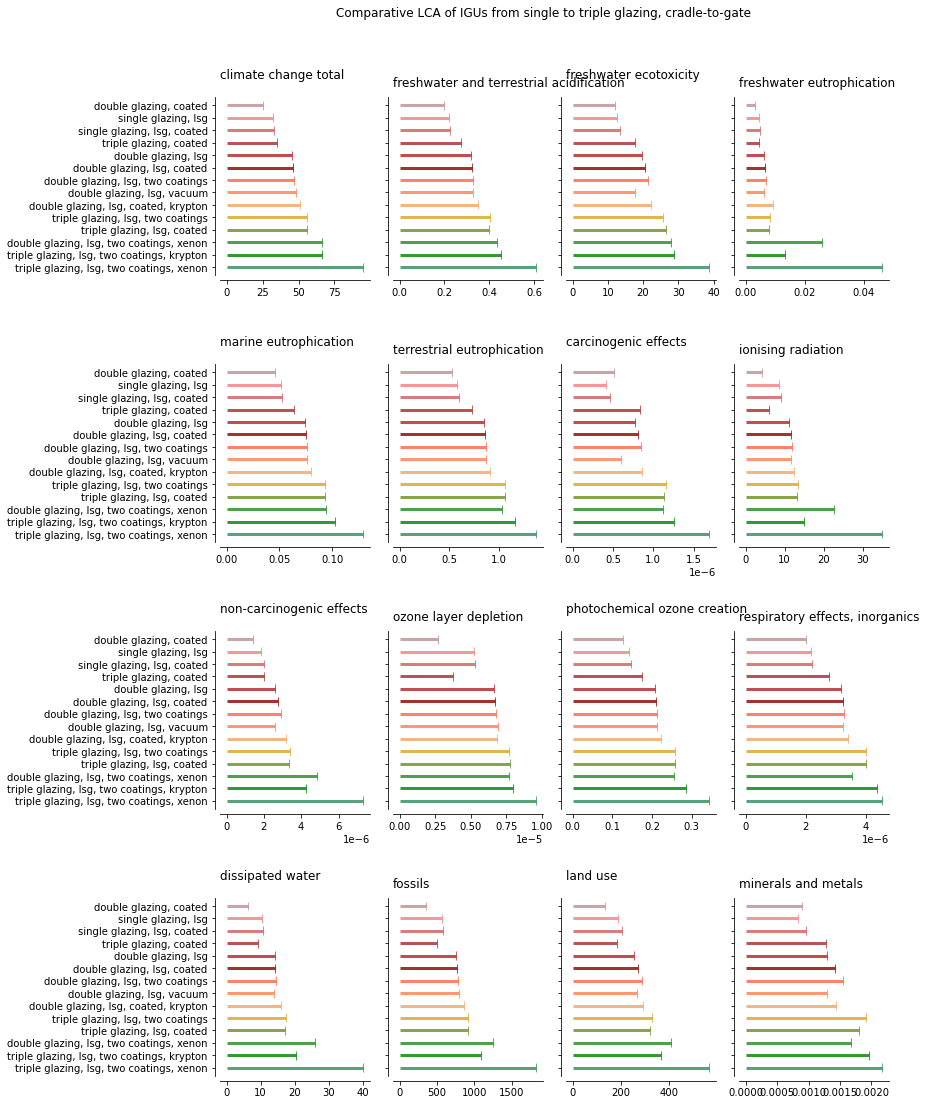

In [75]:
fig, axes = plt.subplots(nrows=4, ncols=4,
                         sharex=False, sharey=True,
                         figsize=(12, 18))

df_plot = df_impact_igus.drop("smart glass, double glazing")

c = ["rosybrown", "lightcoral", "indianred",
     "brown", "firebrick", "darkred",
     "tomato", "coral", "sandybrown",
     "goldenrod", "olivedrab", "forestgreen",
     "green", "seagreen"
     ]

n = 0

for row in range(4):
    for col in range(4):
        col_name = df_plot.columns[n]
        ax = axes[row][col]

        ax.hlines(y=df_plot.index, xmin=0, xmax=df_plot[col_name],
                  linewidth=3, colors=c, alpha=0.8)

        sns.scatterplot(y=df_plot.index, x=df_plot[col_name],
                        hue=df_plot.index, s=80, marker="|",
                        palette=c, ax=ax)

        if (n % 2) == 0:
            ax.set_title(col_name[1], y=1.07, x=0,
                         ha='left', multialignment='left')
        else:
            ax.set_title(col_name[1], y=1.025, x=0,
                         ha='left', multialignment='left')

        ax.xaxis.label.set_visible(False)
        ax.yaxis.label.set_visible(False)

        ax.get_legend().remove()

        n += 1

fig.subplots_adjust(wspace=0.15, hspace=0.5)

fig.suptitle(
    'Comparative LCA of IGUs from single to triple glazing, cradle-to-gate',
    y=0.95
)
sns.despine(offset=5)

**Weighted environmental impact:**

Comparing different types of IGUs according to a single indicator calculated using PEF weighting factors:

In [76]:
# Dropping the unit row index to ease the calculation:
df_weighted_igus = df_impact_igus.copy()
df_weighted_igus.columns = df_weighted_igus.columns.droplevel(2)

# Defining a new DataFrame with the weighted values,
# i.e., multiplication of the impacts by df_weighting:
df_weighted_igus = pd.DataFrame(
    (df_weighted_igus.multiply(
        df_weighting["Weighting factor"].T, axis=1) / 100
     ).sum(axis=1), columns=['Weighted impact']
)

df_weighted_igus = df_weighted_igus.sort_values("Weighted impact",
                                                ascending=True
                                                )

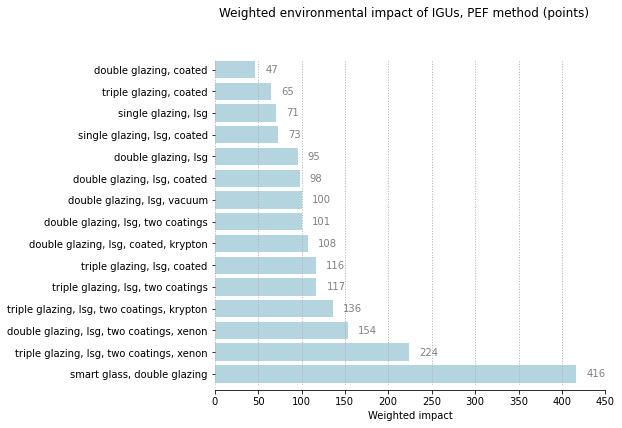

In [78]:
# Displaying a barplot figure with the weighted results:
fig, ax = plt.subplots(figsize=(7, 6))

g = sns.barplot(data=df_weighted_igus,
                x="Weighted impact",
                y=df_weighted_igus.index,
                color="lightblue", linewidth=1.5)

g.bar_label(g.containers[0], fmt="%.0f", padding=10, c='grey')

ax.yaxis.label.set_visible(False)
ax.grid(which='major', axis='x', linestyle=':', linewidth=1)

ax.set_xlim(0, 450)
plt.xticks(np.arange(0, 451, 50))

fig.suptitle('Weighted environmental impact of IGUs,'
             ' PEF method (points)', y=1)
sns.despine(left=True, offset=5)